
📊 Model Performance Metrics:
📌 Mean Absolute Error (MAE): 6150915.60
📌 Mean Squared Error (MSE): 83578940058523.61
📌 R² Score: 0.86


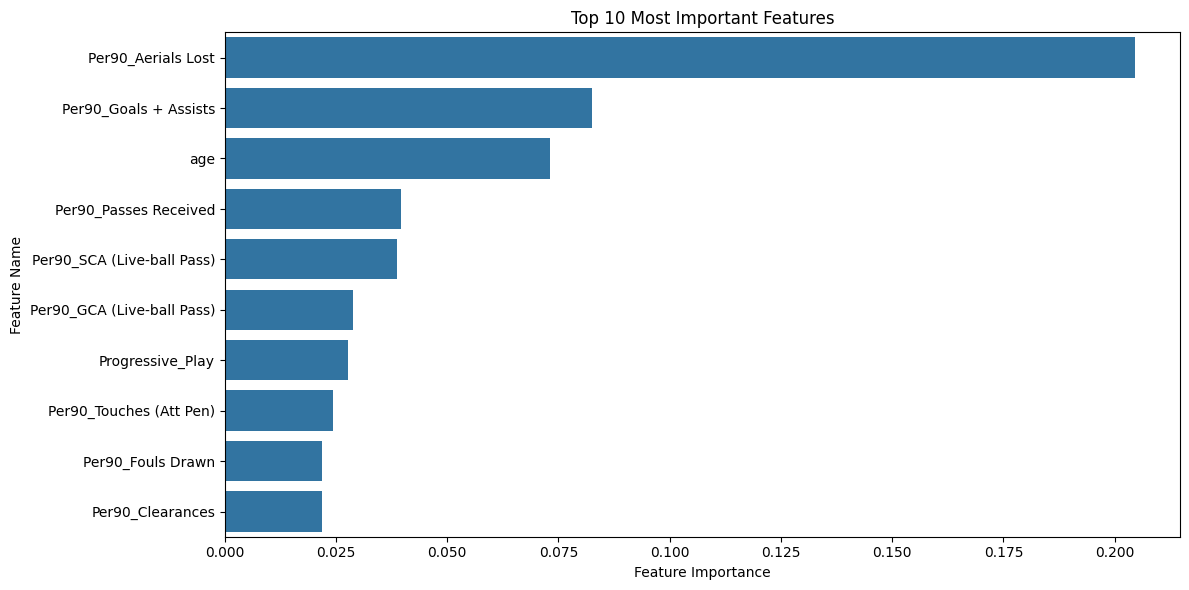


🔍 Top 10 Most Important Features:
                       feature  importance
2           Per90_Aerials Lost    0.204458
19       Per90_Goals + Assists    0.082616
48                         age    0.073143
29       Per90_Passes Received    0.039678
32  Per90_SCA (Live-ball Pass)    0.038800
16  Per90_GCA (Live-ball Pass)    0.028890
51            Progressive_Play    0.027636
43     Per90_Touches (Att Pen)    0.024322
14           Per90_Fouls Drawn    0.021957
9             Per90_Clearances    0.021741


In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns

# Load the Dataset
file_path = "preprocessed_data/outfield_processed.csv"  
df = pd.read_csv(file_path)

# Prepare features and target
X = df.drop(columns=["Player", "player_market_value_euro"], errors="ignore")  
y = df["player_market_value_euro"]

# Split Data into Training and Testing Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Performance Metrics:")
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 R² Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\n🔍 Top 10 Most Important Features:")
print(feature_importance.head(10))